In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [193]:
train=pd.read_csv("train.csv",sep=",", index_col="Id")
test=pd.read_csv("test.csv",sep=",", index_col="Id")

In [194]:
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [195]:
train.shape

(1460, 80)

In [196]:
train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [197]:
#pip install missingno

#!conda install -c conda-forge folium


In [198]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [199]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [200]:
train.isnull().sum().sum()


6965

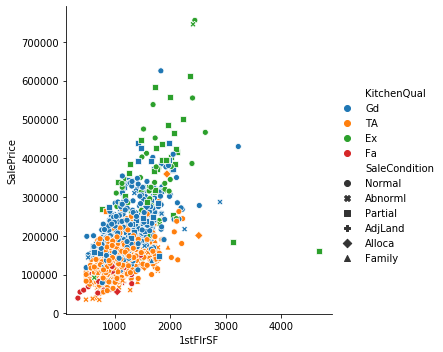

In [201]:
sns.relplot(y="SalePrice", x="1stFlrSF", hue="KitchenQual",style="SaleCondition", data=train)
# default for relplot is scatter
#y and x are variable in data
#hue, categorical or numeric variable in data that will produce different coluring
#style is a variable in the data that will produce diff styles

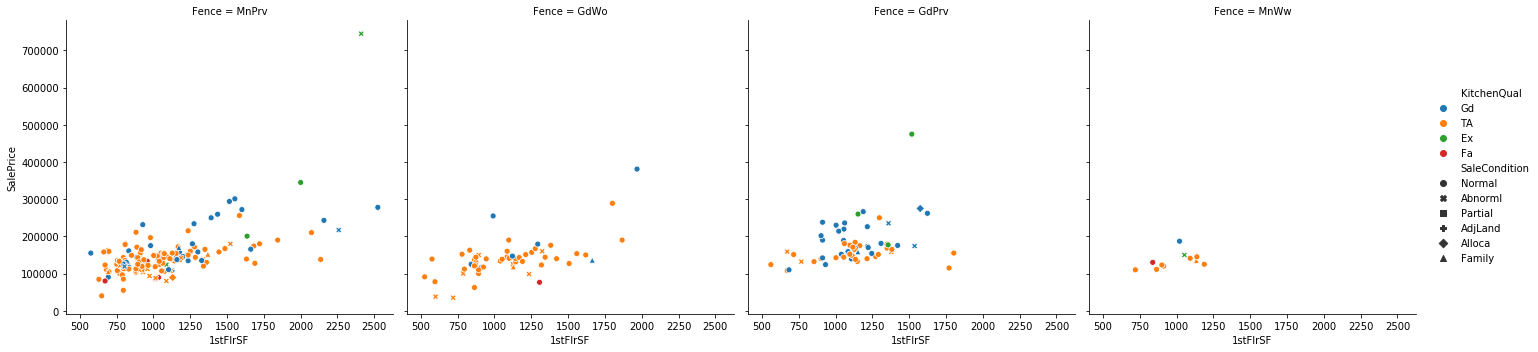

In [202]:
sns.relplot(y="SalePrice", x="1stFlrSF", hue="KitchenQual",style="SaleCondition", col="Fence", data=train)

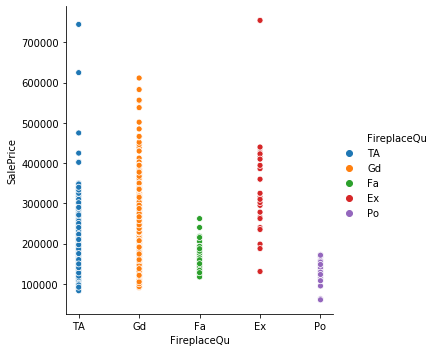

In [203]:
sns.relplot(y="SalePrice", hue="FireplaceQu",x="FireplaceQu", data=train)

In [204]:
#sns.relplot(y="SalePrice", x="1stFlrSF", hue="FireplaceQu",style="FireplaceQu", data=train)

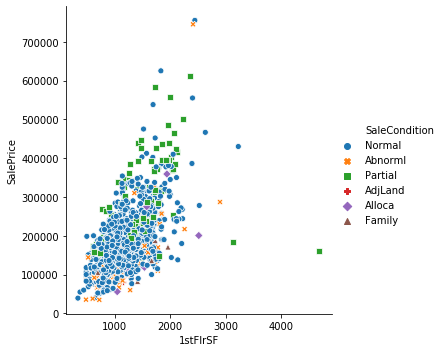

In [205]:
sns.relplot(y="SalePrice", x="1stFlrSF", hue="SaleCondition", style="SaleCondition", data=train)



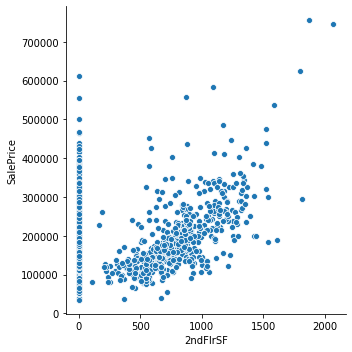

In [206]:
sns.relplot(y="SalePrice", x="2ndFlrSF", data=train)

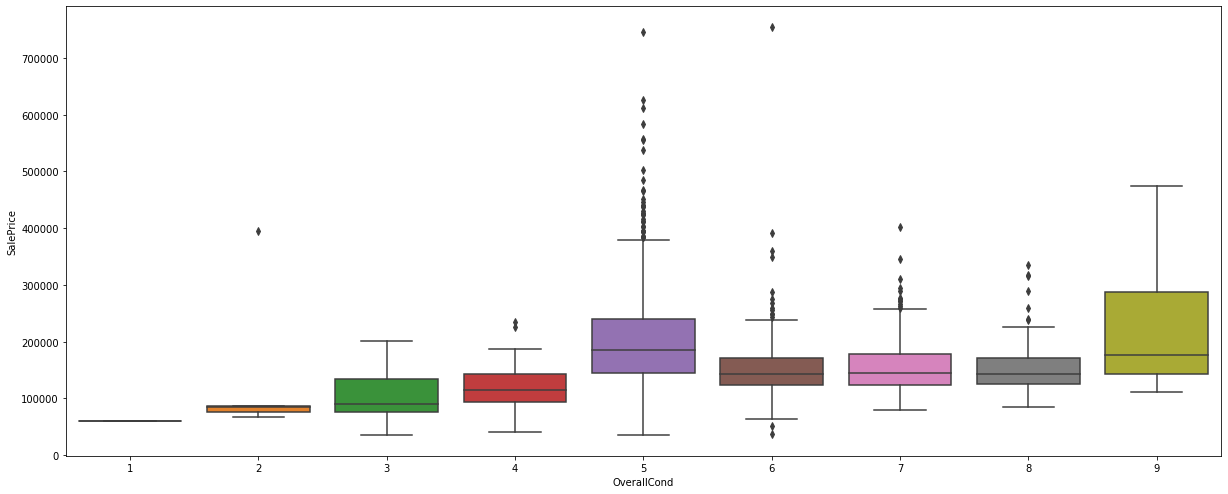

In [207]:
sns.boxplot(x=train.OverallCond, y=train.SalePrice)

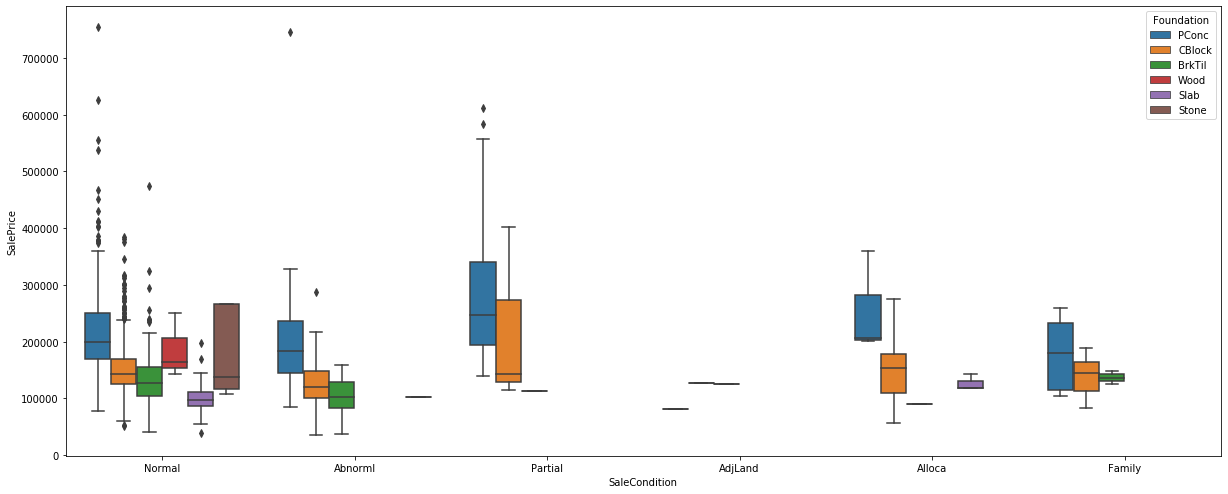

In [208]:
sns.boxplot(x=train.SaleCondition, y=train.SalePrice,hue=train.Foundation)

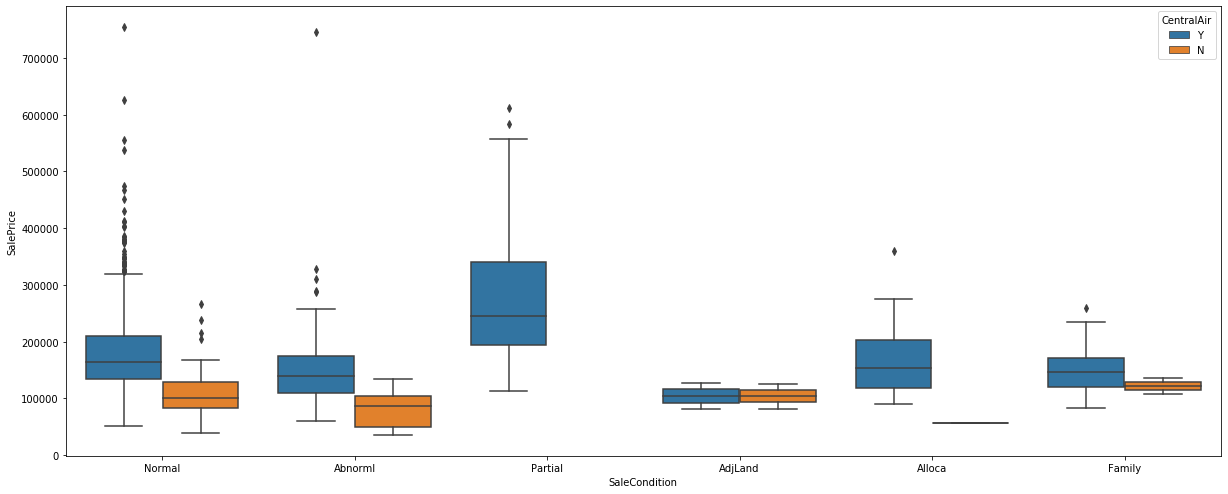

In [209]:
sns.boxplot(x=train.SaleCondition, y=train.SalePrice,hue=train.CentralAir)

In [210]:
k=open("file1",'a+')
k.read()
#k.write("hey buddy")
#k.close()
#k.read()

''

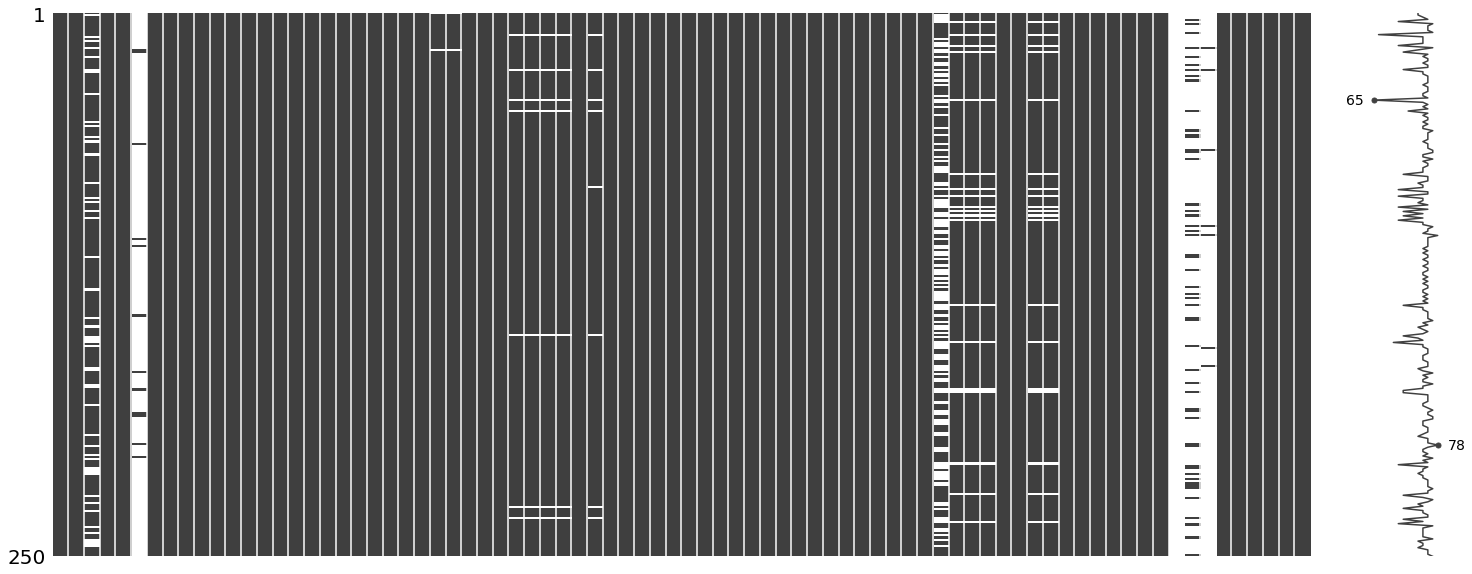

In [211]:
### Visualising missing data with package missing no
## using matrix 
import missingno as msn
%matplotlib inline
msn.matrix(train.sample(250))
#msn.matrix(train)



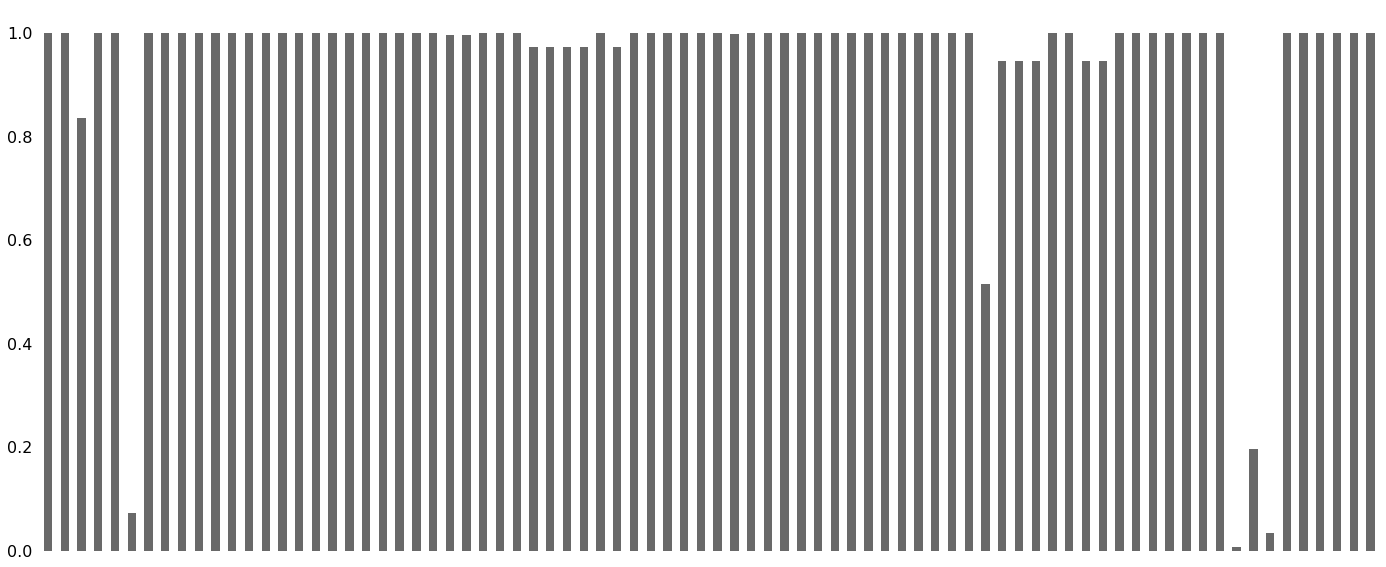

In [212]:
 msn.bar(train.sample(1000))

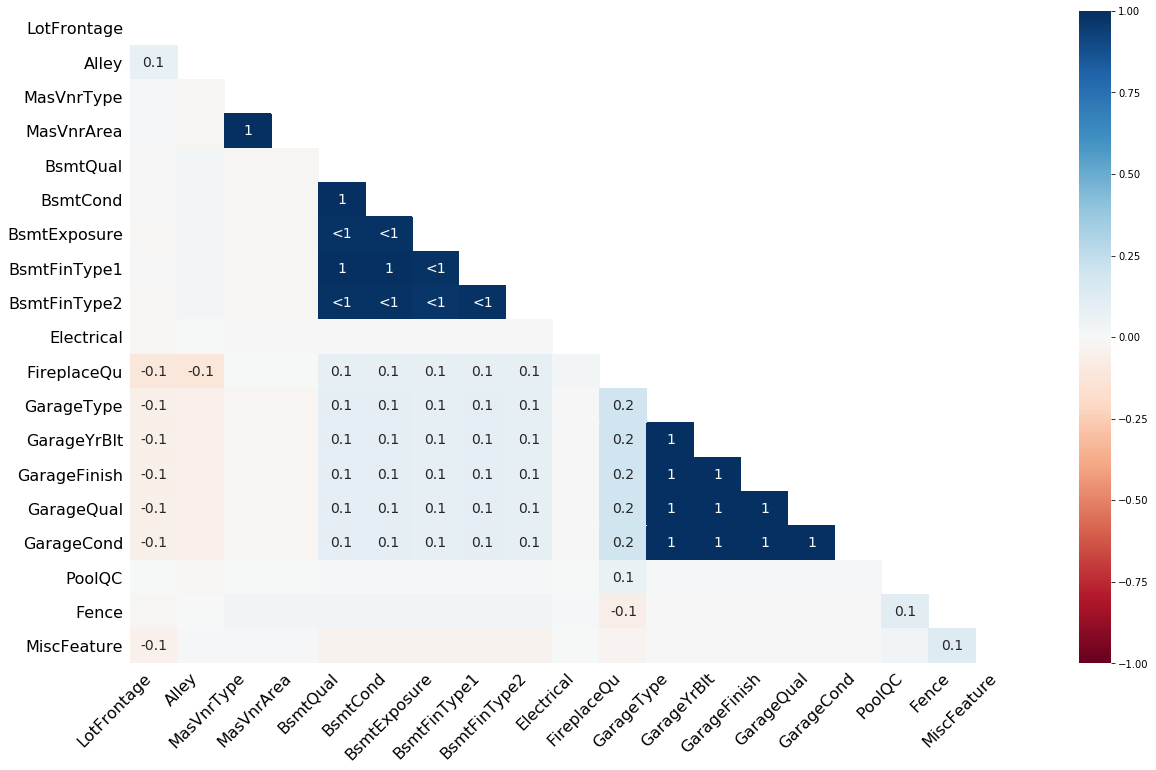

In [213]:
msn.heatmap(train) #measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

In [214]:
#msn.dendrogram(train)
train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [215]:
names=[]
valuesper=[]
actual_values=[]
l=len(train)
for index,i in enumerate(train.isnull().sum()):
    if i>0:
        valuesper.append((i/l)*100)
        actual_values.append(i)
        names.append(train.columns[index])
valuesper.sort(reverse=True)
actual_values.sort(reverse=True)

d={"total missing":actual_values, "percentage missing":valuesper}
#pd.DataFrame(data=(valuesper),index=names,columns=["percentage of missing data"])
pd.DataFrame(data=d,index=names)

,total missing,percentage missing
LotFrontage,1453,99.520548
Alley,1406,96.301370
MasVnrType,1369,93.767123
MasVnrArea,1179,80.753425
BsmtQual,690,47.260274
BsmtCond,259,17.739726
BsmtExposure,81,5.547945
BsmtFinType1,81,5.547945
BsmtFinType2,81,5.547945
Electrical,81,5.547945


In [216]:
train.PoolQC.mode()

0    Gd
dtype: object

In [217]:
#df = pd.DataFrame([[np.nan, 2, np.nan, 0],
#...                    [3, 4, np.nan, 1],
#...                    [np.nan, np.nan, np.nan, 5],
#...                    [np.nan, 3, np.nan, 4]],
#...                   columns=list('ABCD'))
#df

In [218]:
#md=df.A.mode()
#type(md)

In [219]:

## dealing with missing data
# from the data description, some columns that have NA are not actually missing data
# the feature for that particular column is simply not present 

## We are going to fill these columns with none present features being represented as NA
cols_tofill = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu',
               'GarageQual','GarageCond','GarageFinish','GarageType', 'Electrical',
               'KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st',
               'BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2',
               'MSZoning', 'Utilities']

for col in cols_tofill:
    train[col].fillna('None', inplace = True)
    test[col].fillna('None', inplace = True)

def msg(df):
    global names
    names=[]
    valuesper=[]
    actual_values=[]
    l=len(train)
    for index,i in enumerate(df.isnull().sum()):
        if i>0:
            valuesper.append((i/l)*100)
            actual_values.append(i)
            names.append(train.columns[index])
    valuesper.sort(reverse=True)
    actual_values.sort(reverse=True)
    d={"total missing":actual_values, "percentage missing":valuesper}
#pd.DataFrame(data=(valuesper),index=names,columns=["percentage of missing data"])
    return(pd.DataFrame(data=d,index=names))

msg(train)


,total missing,percentage missing
LotFrontage,259,17.739726
MasVnrArea,81,5.547945
GarageYrBlt,8,0.547945


In [220]:
#msg(test)

In [221]:
# data imputation using regression
# first get the attributes that are categorical and those that are numerical

num_attr=train.dtypes[train.dtypes!=object]
cat_attr=train.dtypes[train.dtypes==object]
misng_num=set(num_attr.index)& set(names) # names variable has the attribute with missing data
misng_cat=set(cat_attr.index)& set(names)

print("Categorical attributes still missing data:", misng_cat, "\n")
print("Numerical attributes still missing data:", misng_num,"\n")

#set(names)

Categorical attributes still missing data: set() 

Numerical attributes still missing data: {'MasVnrArea', 'LotFrontage', 'GarageYrBlt'} 



In [222]:
## Looking for which other features correlate well with the numerical attributes still missing data


#sample=train[list(misng_num)]
#sample

#correlation=sample.corrwith(train,axis=1)
#ain.drop(misng_num,axis=1),axis=0)
#correlation.sample(40)
#correlation=sample.corrwith(train.drop(misng_num,axis=1),axis=0)

#r=np.corrcoef(sample.values,train.values)
#k=train.corr()
#sns.heatmap(k)



corr = train.corr()
corr_abs = corr.abs()
#type(corr)
#print(corr_abs)

def ser_corr(x):
    
    target = x

    ser_cor = corr_abs.nlargest(15,target)[target]

    return(ser_cor)


for i in misng_num:
    print(ser_corr(i),"\n", '%'*30)
    
    
    







MasVnrArea      1.000000
SalePrice       0.477493
OverallQual     0.411876
GrLivArea       0.390857
GarageArea      0.373066
GarageCars      0.364204
TotalBsmtSF     0.363936
1stFlrSF        0.344501
YearBuilt       0.315707
TotRmsAbvGrd    0.280682
FullBath        0.276833
BsmtFinSF1      0.264736
GarageYrBlt     0.252691
Fireplaces      0.249070
HalfBath        0.201444
Name: MasVnrArea, dtype: float64 
 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
LotFrontage     1.000000
1stFlrSF        0.457181
LotArea         0.426095
GrLivArea       0.402797
TotalBsmtSF     0.392075
MSSubClass      0.386347
TotRmsAbvGrd    0.352096
SalePrice       0.351799
GarageArea      0.344997
GarageCars      0.285691
Fireplaces      0.266639
BedroomAbvGr    0.263170
OverallQual     0.251646
BsmtFinSF1      0.233633
PoolArea        0.206167
Name: LotFrontage, dtype: float64 
 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
GarageYrBlt      1.000000
YearBuilt        0.825667
YearRemodAdd     0.642277
GarageCars       0.588920
GarageArea   

In [223]:
# creating a subset of data where there are not NAs
train1=train.dropna(axis=0)
fl=["1stFlrSF", "LotArea", "GrLivArea","TotalBsmtSF","MSSubClass","LotFrontage" ]
trainfl=train1[fl]

## finding total entries with Fl data mising
msngfl=train["LotFrontage"].isnull()
fl2=["1stFlrSF", "LotArea", "GrLivArea","TotalBsmtSF","MSSubClass" ]
msngfl2=pd.DataFrame(train[fl2][msngfl])


In [224]:
msngfl=train["LotFrontage"].isnull()
type(msngfl)
msngfl2=pd.DataFrame(train[fl2][msngfl])
msngfl2.shape
set(fl2) & set(num_attr.index)
#trainfl.sample(20)

{'1stFlrSF', 'GrLivArea', 'LotArea', 'MSSubClass', 'TotalBsmtSF'}

In [225]:
#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X=trainfl.drop("LotFrontage", axis=1).values
Y=trainfl["LotFrontage"].values

#Training data spliting 

#test_size = 0.4
#seed = 42
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,random_state=seed, shuffle=True)

#model training 

#model1 = LinearRegression()
#k=model1.fit(X_train, Y_train)

# predicting

#predicted = model1.predict(X_test)
#result1 = r2_score(Y_pred, Y_test)

# Results accuracy 

#print("Accuracy: ",  (result1*100.0))


kfold = KFold(n_splits=15, random_state=78,shuffle=True)
model = LinearRegression()
scoring = 'r2'
results1 = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results1.mean(), results1.std())

results2 = cross_val_score(model, X, Y, cv=kfold, scoring="neg_mean_absolute_error")
print(results2.mean(), results2.std())

model.fit(X,Y)

k=model.predict(msngfl2)


            






0.3478621755007119 0.13788961381923656
-12.649928203873484 1.8491635365766603


In [226]:
### replacing the predicted values into the data frame

msng_index=train.LotFrontage[train["LotFrontage"].isnull()]
msng_index=msng_index.index

for i in msng_index:
    for v in k:
        train["LotFrontage"][i]=v
print(train["LotFrontage"].isnull().sum())
            
        

0


In [227]:
###  MasVnrArea


train1=train.dropna(axis=0)
mva1=["SalePrice", "GrLivArea","GarageArea","GarageCars","TotalBsmtSF", "MasVnrArea"]
trainmva=train1[mva1]

## finding total entries with mva data mising
msng_msa1=train["MasVnrArea"].isnull()
mva2=["SalePrice", "GrLivArea","GarageArea","GarageCars","TotalBsmtSF" ] 
msng_msa2=pd.DataFrame(train[mva2][msng_msa1])


X=trainmva.drop("MasVnrArea", axis=1).values
Y=trainmva["MasVnrArea"].values


kfold = KFold(n_splits=15, random_state=25,shuffle=True)
model = LinearRegression()
scoring = 'r2'
results1 = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results1.mean(), results1.std())

results2 = cross_val_score(model, X, Y, cv=kfold, scoring="neg_mean_absolute_error")
print(results2.mean(), results2.std())

model.fit(X,Y)

k2=model.predict(msng_msa2)
len(k2)

0.21315082193132878 0.1526356045076037
-109.56043183152184 12.48859635523506


8

In [228]:
## The regression imputation doesnot seem to be working for the rest 
## the other values are going to be replaced with the mean for those columns
for i in ("MasVnrArea","GarageYrBlt" ):
    train.fillna({i:train[i].mean()}, inplace = True)
    test.fillna({i:train[i].mean()}, inplace = True)
    print(train[i].isnull().sum())
    print(train[i].isnull().sum())


0
0
0
0


The dimensions are: (1460, 37)
graph has failed to plot for: BsmtFinSF2
graph has failed to plot for: LowQualFinSF
graph has failed to plot for: BsmtHalfBath
graph has failed to plot for: KitchenAbvGr
graph has failed to plot for: EnclosedPorch
graph has failed to plot for: 3SsnPorch
graph has failed to plot for: ScreenPorch
graph has failed to plot for: PoolArea
graph has failed to plot for: MiscVal
graph has failed to plot for: SalePrice
['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


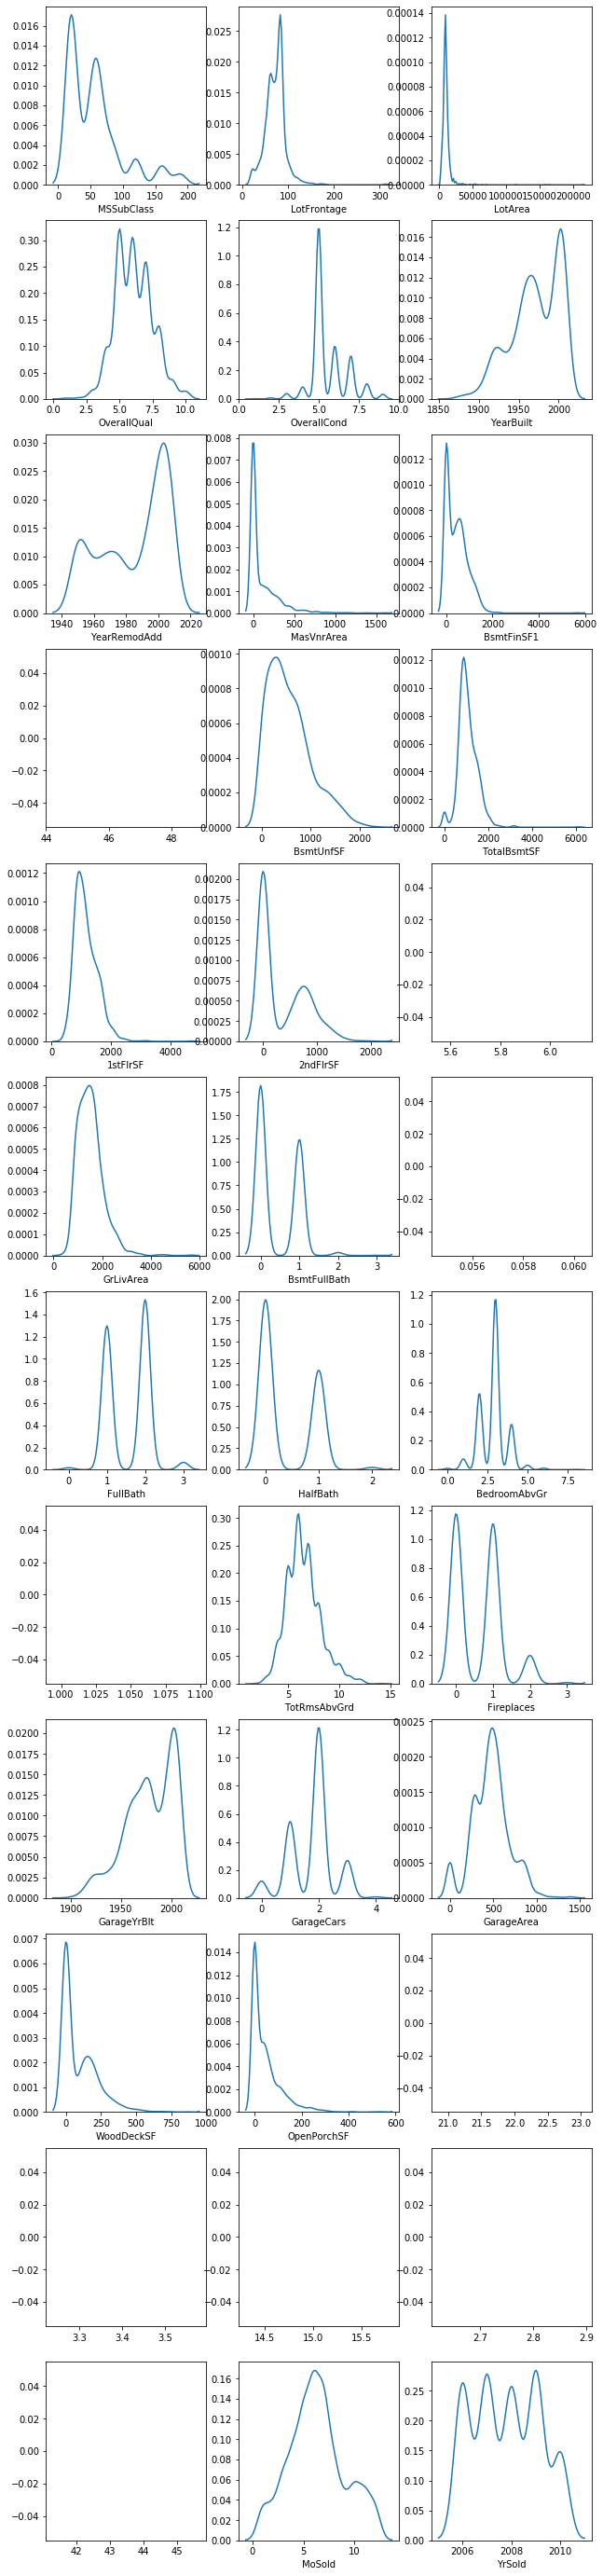

In [229]:
# plot a distrubution plots for the numerical variables 
train_num=train.select_dtypes(include="number",exclude="object") # selects all the numerical attributes
f = plt.figure(figsize=(10.5,50))
print("The dimensions are:", train_num.shape)

fail=[]
for i,col in enumerate(train_num.columns):
    try:
        f.add_subplot(12, 3, i+1)
        sns.distplot(train_num[col], hist=False)
        
    except:
        print("graph has failed to plot for:",col)
        fail.append(col)

print(fail)
#train_num.dtypes





['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']


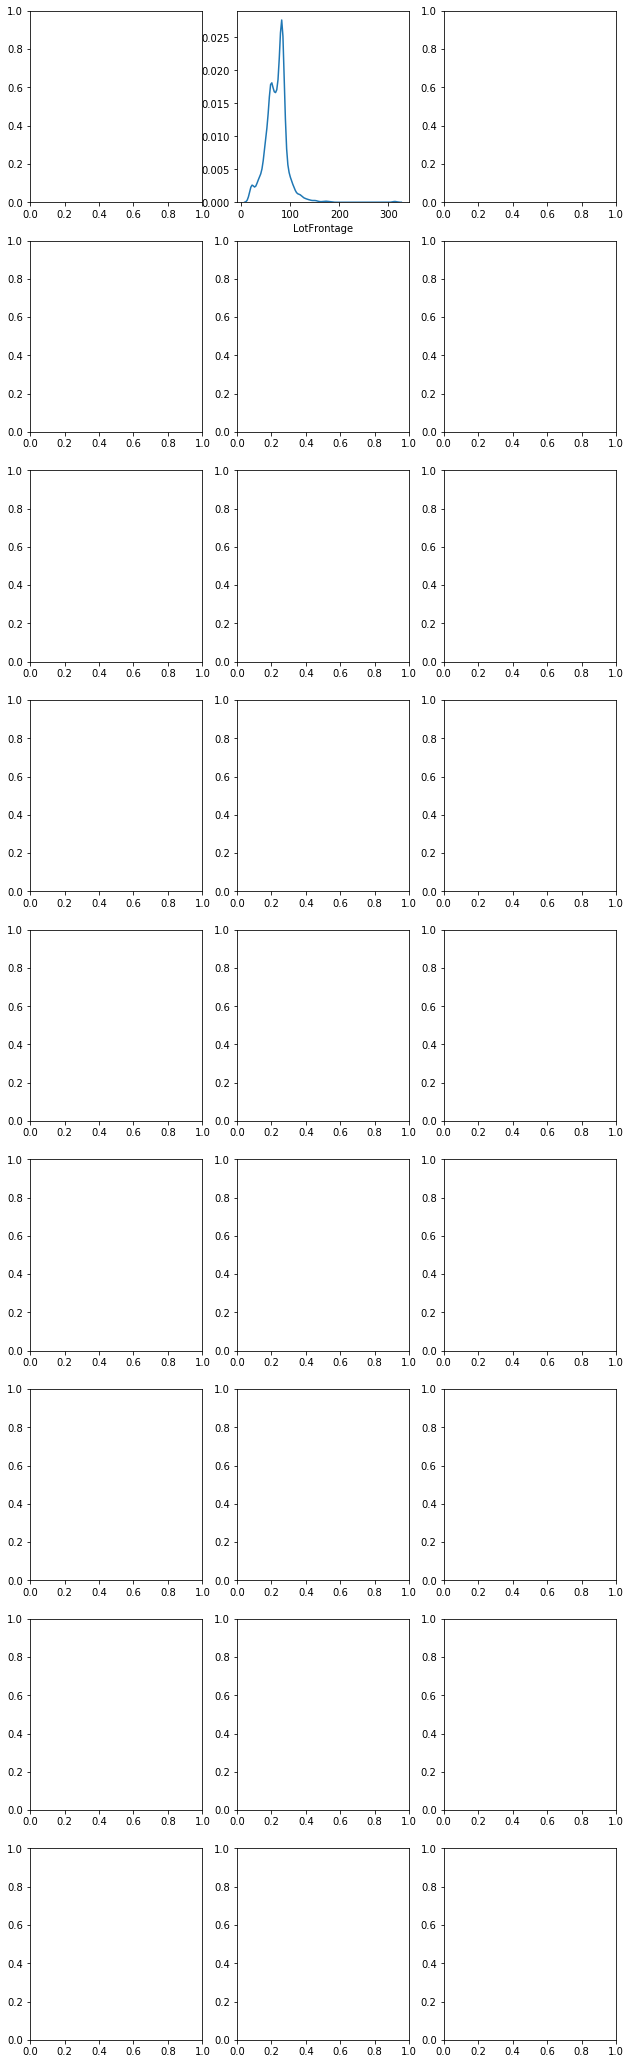

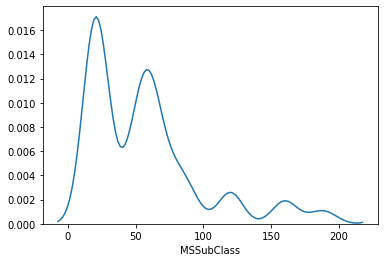

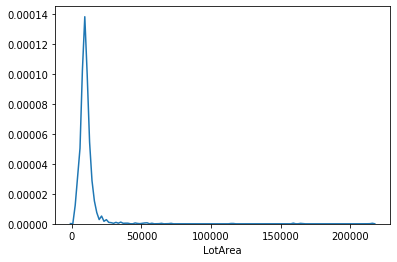

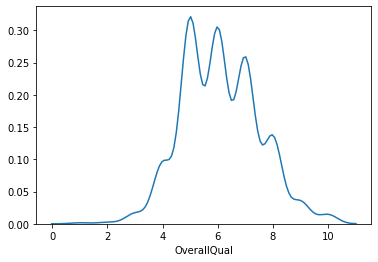

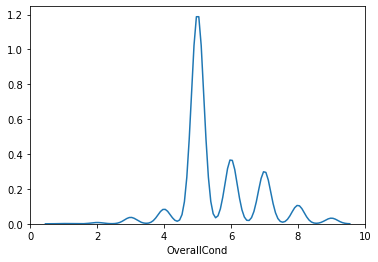

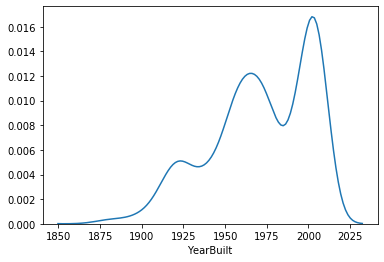

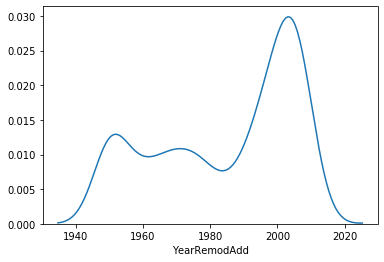

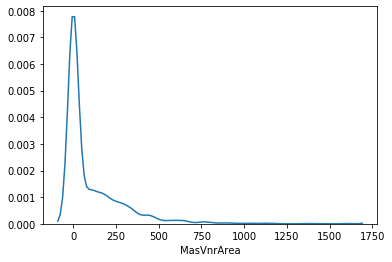

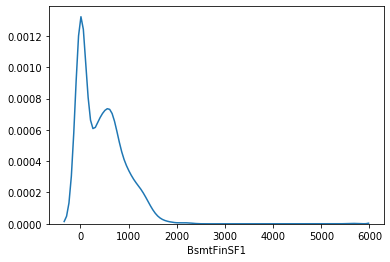

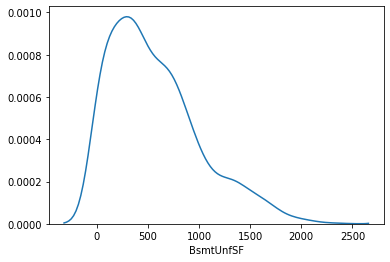

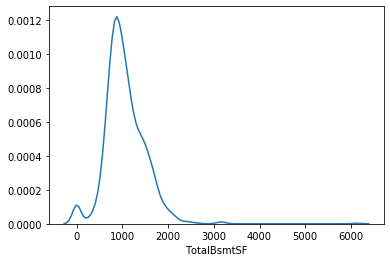

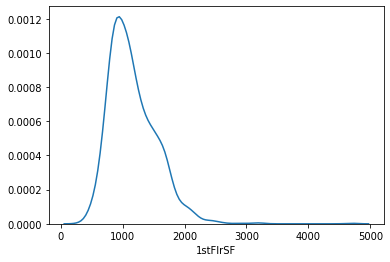

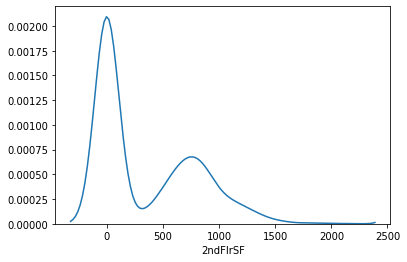

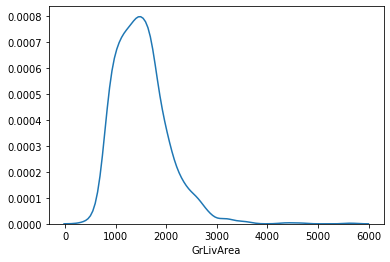

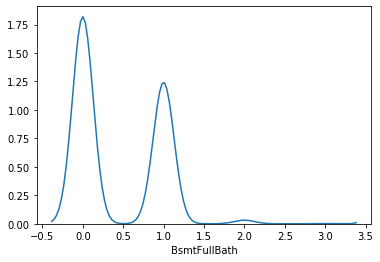

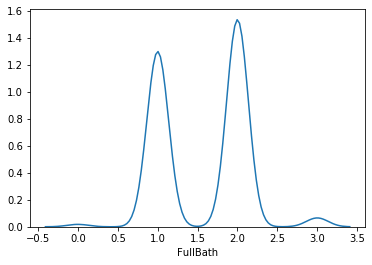

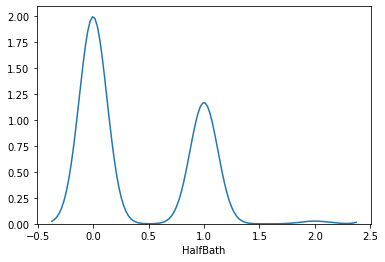

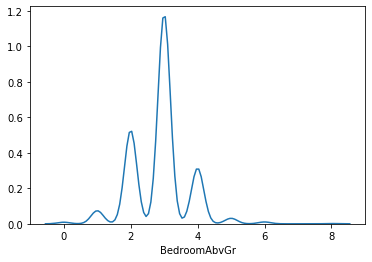

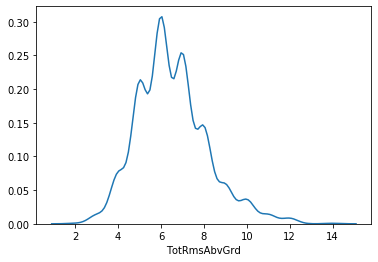

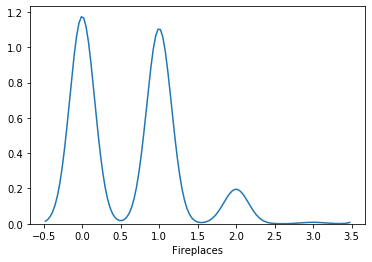

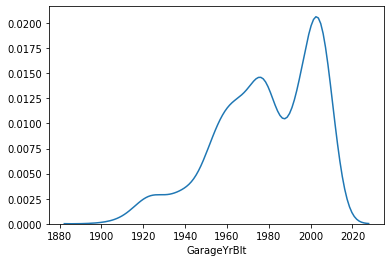

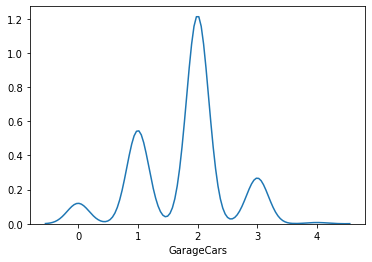

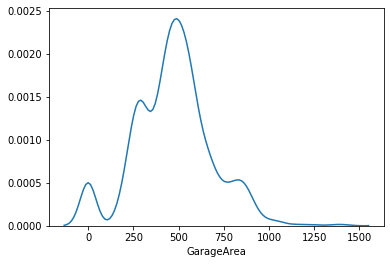

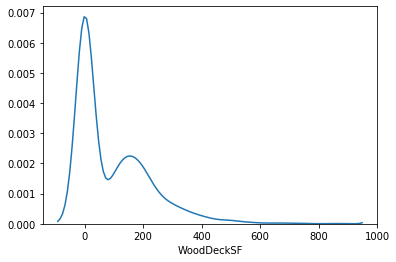

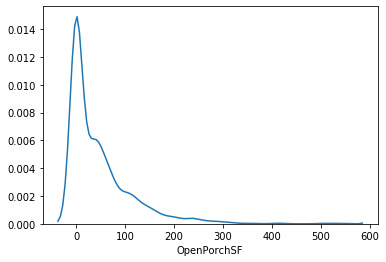

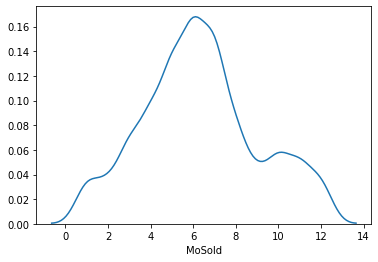

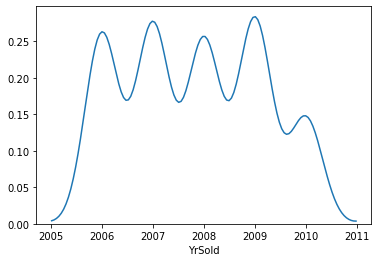

In [230]:
print(fail)
train_num[fail]
f = plt.figure(figsize=(10.5,50))
for i,col in enumerate(train_num.drop(fail,axis=1).columns):
    plt.figure(i)
    try:
        f.add_subplot(12, 3, i+1)
        sns.distplot(train_num[col], hist=False)
        
    except:
        print("graph has failed to plot for:",col)
        fail.append(col)


In [231]:
### Getting the attributes with skew

with_skew=[]

for i in train_num.columns:
    #print(train1[i].skew())
    if train_num[i].skew() < -1 or train_num[i].skew() > 1:
        with_skew.append(i)
        print("skewness for", i, "is", train_num[i].skew())
        print("skewness for", i, "is", train_num[i].kurtosis())
        



skewness for MSSubClass is 1.4076567471495591
skewness for MSSubClass is 1.5801879649863309
skewness for LotFrontage is 1.9014167788659322
skewness for LotFrontage is 18.289832030518575
skewness for LotArea is 12.207687851233496
skewness for LotArea is 203.24327101886033
skewness for MasVnrArea is 2.676411784729959
skewness for MasVnrArea is 10.15431640146072
skewness for BsmtFinSF1 is 1.685503071910789
skewness for BsmtFinSF1 is 11.118236291964712
skewness for BsmtFinSF2 is 4.255261108933303
skewness for BsmtFinSF2 is 20.11333754558646
skewness for TotalBsmtSF is 1.5242545490627664
skewness for TotalBsmtSF is 13.250483281984796
skewness for 1stFlrSF is 1.3767566220336365
skewness for 1stFlrSF is 5.74584148244079
skewness for LowQualFinSF is 9.011341288465387
skewness for LowQualFinSF is 83.2348166744174
skewness for GrLivArea is 1.3665603560164552
skewness for GrLivArea is 4.895120580693174
skewness for BsmtHalfBath is 4.103402697955168
skewness for BsmtHalfBath is 16.396641945350446


In [232]:
# tranforming attributes with skew 
#to_transform=["SalePrice"]

df_tranformed=pd.DataFrame()
for i in with_skew:
    df_tranformed[i] = np.log(train[i])
#print(df_tranformed)
    
for i in df_tranformed.columns:
    if df_tranformed[i].skew() < -1 or df_tranformed[i].skew() > 1:
        print("skewness for", i, "is", df_tranformed[i].skew())

skewness for LotFrontage is -1.066996284436851


In [233]:
train_num.drop(with_skew,inplace=True, axis=1)# drop the original vlaues for the features with skew


In [234]:
train_num=pd.concat([train_num,df_tranformed],axis=1) # replaced the features with skew with new values
train_num.shape


(1460, 37)

failed for MasVnrArea
failed for BsmtFinSF1
failed for BsmtFinSF2
failed for TotalBsmtSF
failed for LowQualFinSF
failed for BsmtHalfBath
failed for KitchenAbvGr
failed for WoodDeckSF
failed for OpenPorchSF
failed for EnclosedPorch
failed for 3SsnPorch
failed for ScreenPorch
failed for PoolArea
failed for MiscVal


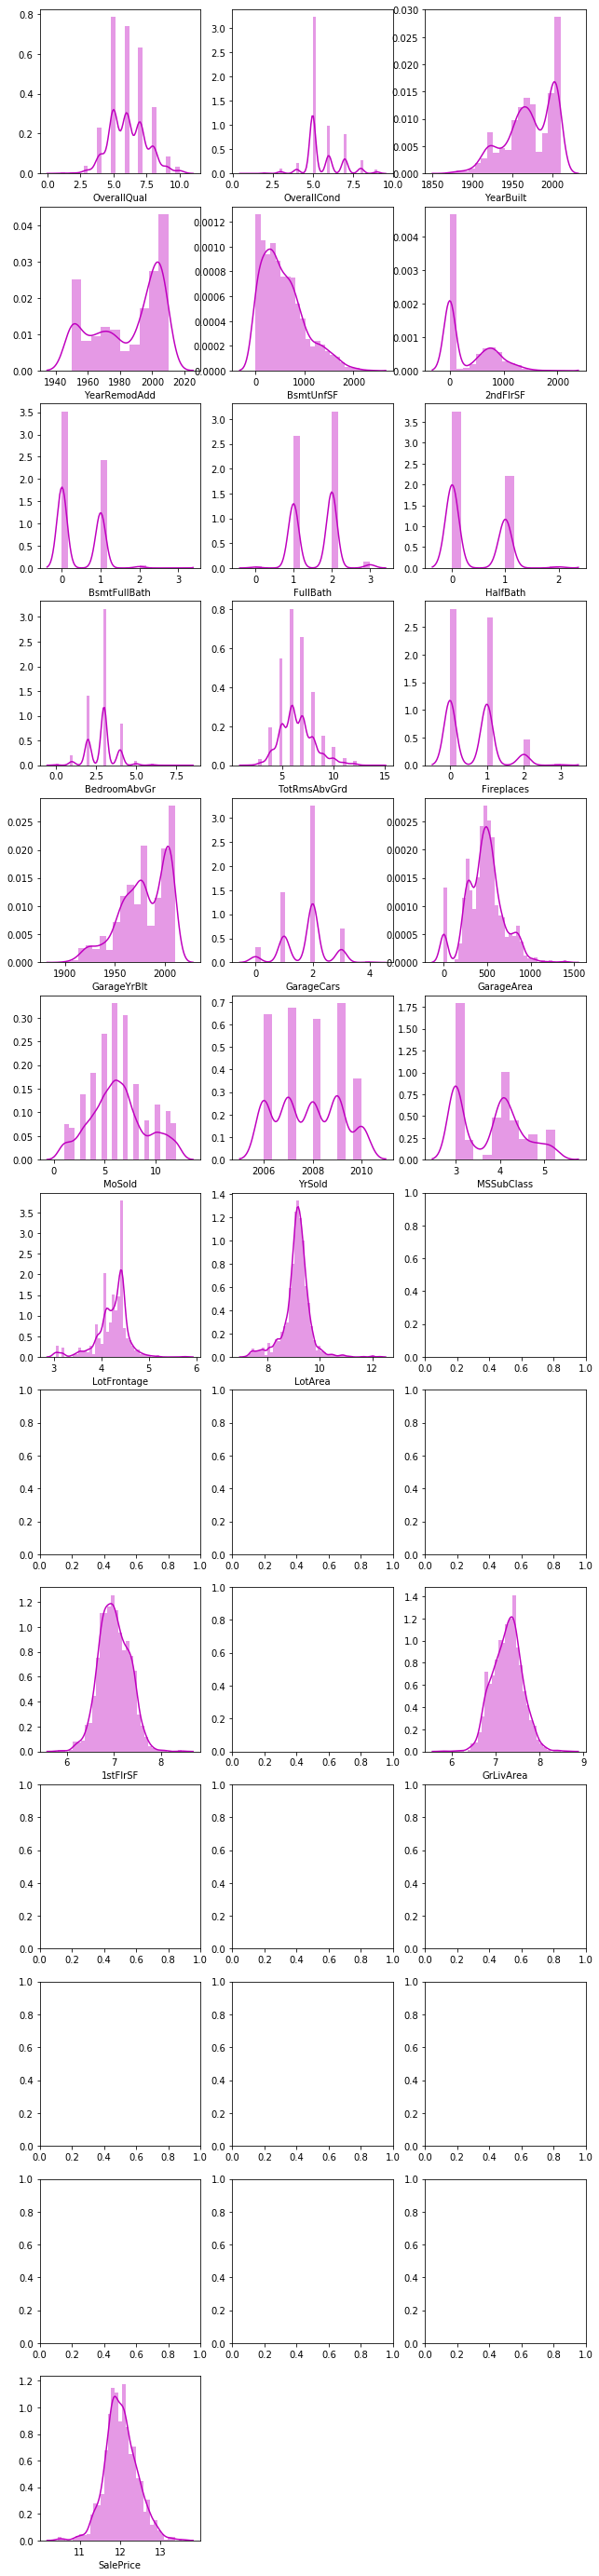

In [235]:
## plots after correcting the skew 
import warnings
warnings.filterwarnings('ignore')

f = plt.figure(figsize=(10.5,50))
for i,col in enumerate(train_num.columns):
    try:
        f.add_subplot(13, 3, i+1)
        sns.distplot(train_num[col],color="m")
    except:
        print("failed for", col)
    #f.add_subplot(13, 3, i+1)
    #sns.distplot(d, color="m", ax=axes[1, 1])
    #sns.distplot(data[i,0,0,0], hist=False)
plt.show()
    

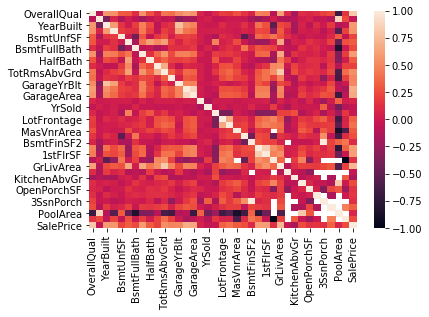

In [236]:
# correlation of the numerical variables with the target variable
from matplotlib import rcParams
corr=train_num.corr(method="pearson")
sns.heatmap(corr)
rcParams['figure.figsize'] = (20.7,8.27)
plt.show()

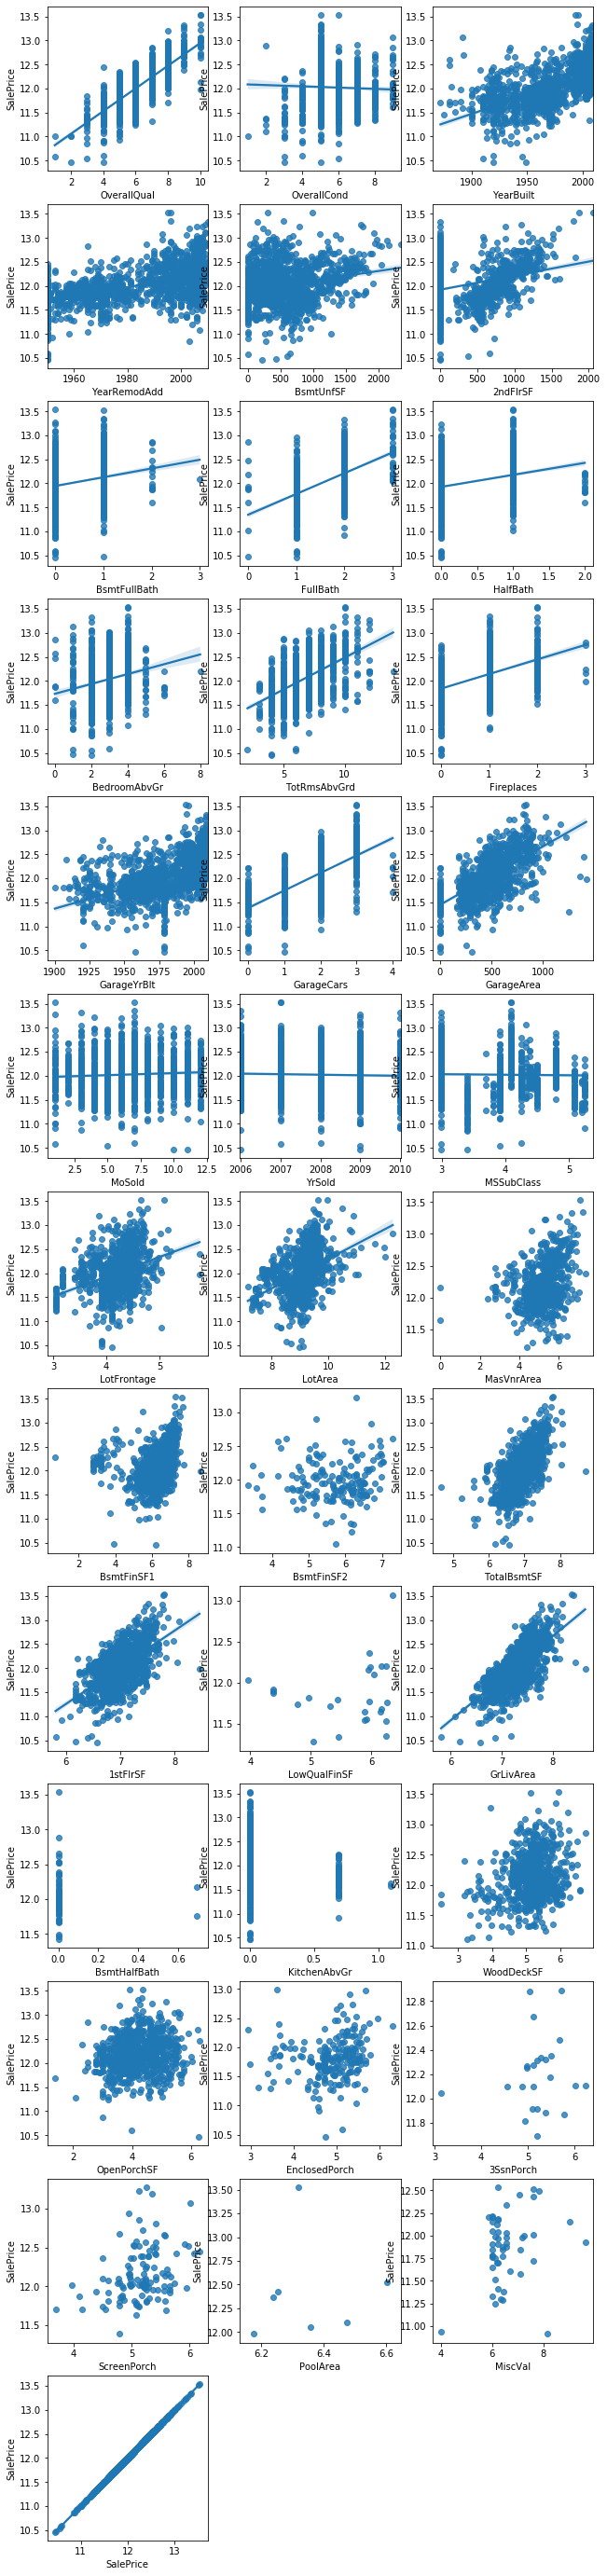

In [237]:

f = plt.figure(figsize=(10.5,50))
for i,col in enumerate(train_num.columns):
    try:
        f.add_subplot(13, 3, i+1)
        sns.regplot(x=col, y="SalePrice", data=train_num)
        #sns.distplot(train_num[col],color="m")
    except:
        print("failed for", col)
    #f.add_subplot(13, 3, i+1)
    #sns.distplot(d, color="m", ax=axes[1, 1])
    #sns.distplot(data[i,0,0,0], hist=False)
plt.show()

In [238]:

#!htop


In [239]:

corr_abs = corr.abs()
target = 'SalePrice'

num_ft = len(train_num)
sal_cor = corr_abs.nlargest(num_ft, target)[target]
sal_cor

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.730255
GarageCars       0.680625
GarageArea       0.650888
1stFlrSF         0.608947
TotalBsmtSF      0.604831
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.500449
Fireplaces       0.489449
LotArea          0.399918
LotFrontage      0.342852
ScreenPorch      0.329007
2ndFlrSF         0.319300
HalfBath         0.313982
MasVnrArea       0.311805
BsmtFinSF1       0.261217
WoodDeckSF       0.257391
MiscVal          0.247628
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
EnclosedPorch    0.162847
KitchenAbvGr     0.151365
OpenPorchSF      0.144199
LowQualFinSF     0.130840
3SsnPorch        0.125814
BsmtFinSF2       0.097629
PoolArea         0.071015
MoSold           0.057329
YrSold           0.037263
OverallCond      0.036868
BsmtHalfBath     0.025631
MSSubClass       0.019761
Name: SalePrice, dtype: float64

In [240]:
## choosing numerical features with the highest correlation
min_val_corr = 0.5

num_above = list(sal_cor[sal_cor.values > min_val_corr].index)
print(num_above)
len(num_above)



['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt']


12

In [241]:
###dropping the numerical variables with correlation lower than expected
num_drop=set(train_num.columns)-set(num_above)
train_num.drop(num_drop,axis=1,inplace=True)

In [242]:
train_num.shape

(1460, 12)

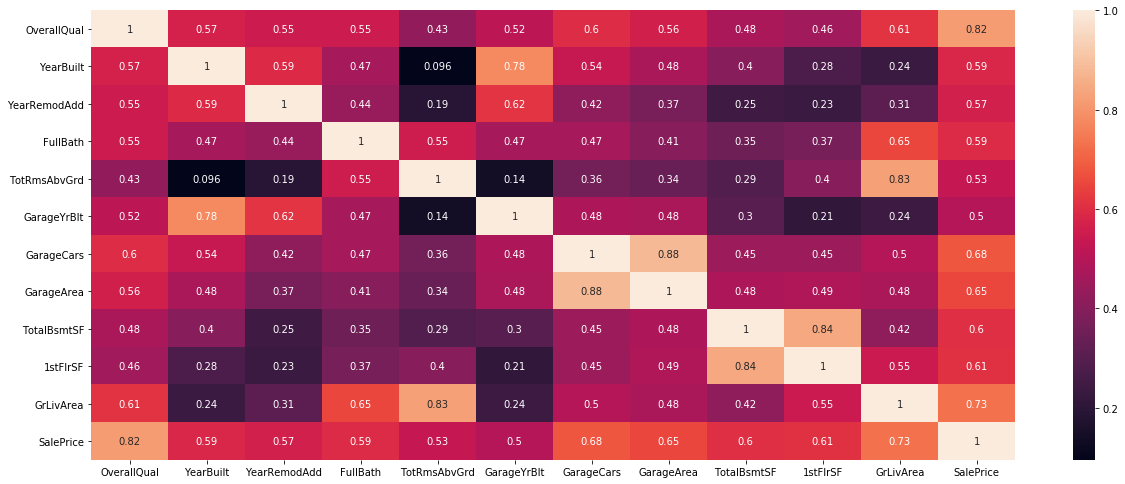

In [243]:
### corr to see if the variable chosen are correlated among themselves

corr=train_num.corr(method="pearson")
sns.heatmap(corr,annot=True)

## 



In [244]:
train_cat=train.select_dtypes(include="object",exclude="number")
train_cat.shape

(1460, 43)

In [245]:
## We sometimes need to reduce the number of level for the categorical attributes 

train["SalePriceLog"]=train_num.SalePrice

for cat in train_cat.columns:
    print(train.groupby(cat)["SalePriceLog"].mean(), '\n', '\n', '*'*30)

MSZoning
C (all)    11.118259
FV         12.246616
RH         11.749840
RL         12.085885
RM         11.692893
Name: SalePriceLog, dtype: float64 
 
 ******************************
Street
Grvl    11.667435
Pave    12.025522
Name: SalePriceLog, dtype: float64 
 
 ******************************
Alley
Grvl    11.673354
None    12.037675
Pave    11.996812
Name: SalePriceLog, dtype: float64 
 
 ******************************
LotShape
IR1    12.163465
IR2    12.318450
IR3    12.205413
Reg    11.936094
Name: SalePriceLog, dtype: float64 
 
 ******************************
LandContour
Bnk    11.810740
HLS    12.259257
Low    12.120086
Lvl    12.022694
Name: SalePriceLog, dtype: float64 
 
 ******************************
Utilities
AllPub    12.024183
NoSeWa    11.831379
Name: SalePriceLog, dtype: float64 
 
 ******************************
LotConfig
Corner     12.027446
CulDSac    12.249810
FR2        12.034741
FR3        12.195684
Inside     12.001900
Name: SalePriceLog, dtype: float64 
 
 **

In [246]:
#classified the unique values in each of the categorical features

## 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']

for df in [train_cat, test,train]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4






In [247]:
print(train_cat.loc[(train['MSZoning'].isin(msz_catg2) ), 'MSZ_num'])  

Id
9       2
16      2
22      2
24      2
30      2
       ..
1429    2
1439    2
1442    2
1450    2
1453    2
Name: MSZ_num, Length: 234, dtype: int64


In [248]:
train["SalePriceLog"]=train_num["SalePrice"]

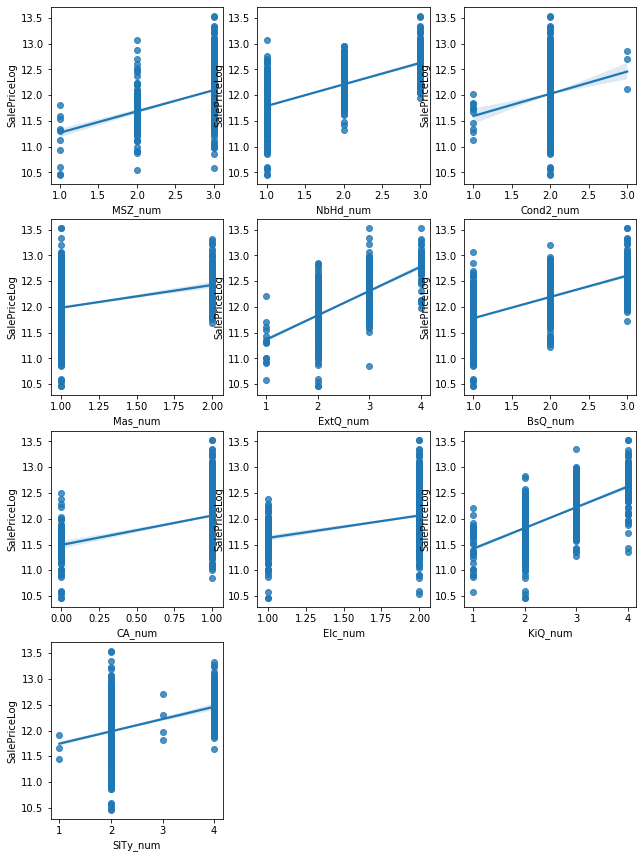

In [249]:

new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

f = plt.figure(figsize=(10.5,50))
for i,col in enumerate(new_col_num):
    try:
        f.add_subplot(13, 3, i+1)
        sns.regplot(train[col], train["SalePriceLog"], data=train)
        #sns.distplot(train_num[col],color="m")
    except:
        print("failed for", col)
    #f.add_subplot(13, 3, i+1)
    #sns.distplot(d, color="m", ax=axes[1, 1])
    #sns.distplot(data[i,0,0,0], hist=False)
plt.show()

In [250]:
#train_cat.columns

In [251]:
#train_cat["Street"]

In [252]:
#categorical features with strong correlation to the Saleprice were chosen based on the
#observed variations in their box plots 
#box plots where significant different are seen btw the categorical values with respect to changes in saleprices
#are strongly correlated with Saleprice

catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]

In [253]:
train_cat.sample()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
Id,,,,,,,,,,,,,,,,,,,,,
1090,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,3,2,2,1,3,2,1,2,3,2


In [254]:
cat_drop=catg_strong_corr+ catg_weak_corr ## already replaced the strongly correlated variables with numericals so we can drop them now
for df in [train,train_cat,test]:
    df.drop(cat_drop,inplace=True,axis=1)

In [255]:
train_cat.sample()

,MSZ_num,NbHd_num,Cond2_num,Mas_num,ExtQ_num,BsQ_num,CA_num,Elc_num,KiQ_num,SlTy_num
Id,,,,,,,,,,
1415,3,1,2,1,2,1,1,2,3,2


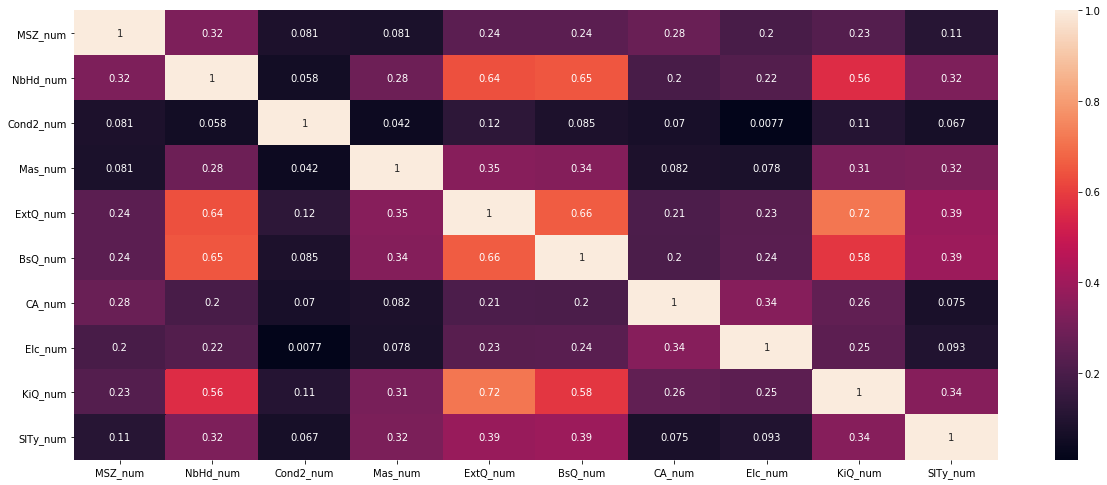

In [256]:
# Calculating correlation for newly transformed categorical variables

corr=train_cat.corr(method="pearson")
sns.heatmap(corr,annot=True)



In [257]:
train_cat["SalePriceLog"]= train["SalePriceLog"]
corr=train_cat.corr(method="pearson")
corr_abs = corr.abs()
target = "SalePriceLog"

num_ft = len(train_cat)
sal_cor = corr_abs.nlargest(num_ft, target)[target]
sal_cor

SalePriceLog    1.000000
NbHd_num        0.696515
ExtQ_num        0.678840
KiQ_num         0.667893
BsQ_num         0.659285
MSZ_num         0.409405
CA_num          0.351600
SlTy_num        0.335339
Mas_num         0.311369
Elc_num         0.304862
Cond2_num       0.105442
Name: SalePriceLog, dtype: float64

In [258]:
# dropping categorical variables that have a correlation less than 0.35

cor_low=0.35

for i,value in enumerate(sal_cor):
    if value < cor_low:
        train_cat.drop(sal_cor.index[i],inplace=True,axis=1 )
        #print(sal_cor.index[i])
        
        
print(train_cat.shape)



(1460, 7)


In [259]:
# joining the two dataframes with chosen numeric and categorical variables
train_new=pd.concat([train_num,train_cat],axis=1)
print(train_new.shape)
train_new.drop("SalePrice", inplace=True, axis=1)



(1460, 19)


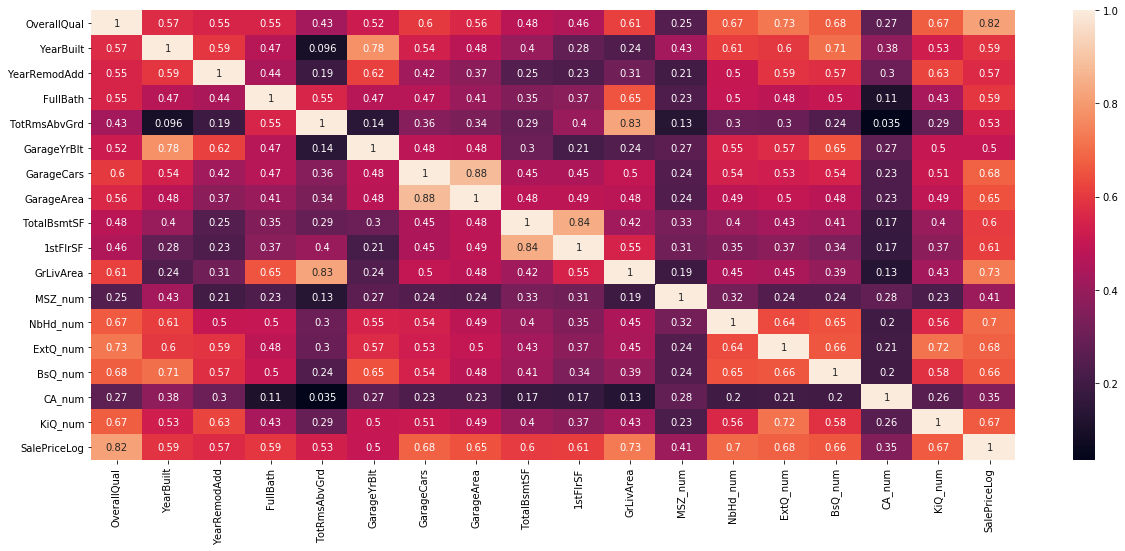

In [260]:
# checking for Multicolinearity between the chosen total attributes
# Next we shall drop the feature that is highly correlated with another variable that has a lower correlation with saleprice
# cut off to use will be 0.7
corr=train_new.corr(method="pearson")
sns.heatmap(corr,annot=True)



In [261]:
train_new.columns

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'MSZ_num', 'NbHd_num', 'ExtQ_num', 'BsQ_num', 'CA_num',
       'KiQ_num', 'SalePriceLog'],
      dtype='object')

In [262]:
to_drop=["GarageYrBlt","GarageArea",""]